In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# =============================================================================
# globals
# defining our example
# =============================================================================
m1 = 1  # mass of the 1st pendulum
m2 = 1  # mass of the 2nd pendulum
g = 10  # gravity
r1 = 1  # length of the 1st pendulum
r2 = 1  # length of the 2nd pendulum
x = y = []


In [25]:

def angular_acc1(a1_arr, a2_arr):

    num = (
        -g * (2 * m1 + m2) * np.sin(a1_arr[0])
        - m2 * g * np.sin(a1_arr[0] - 2 * a2_arr[0])
        - 2
        * m2
        * np.sin(a1_arr[0] - a2_arr[0])
        * (
            r2 * pow(a2_arr[1], 2)
            + r1 * pow(a1_arr[1], 2) * np.cos(a1_arr[0] - a2_arr[0])
        )
    )
    den = r1 * (2 * m1 + m2 - m2 * np.cos(2 * a1_arr[0] - 2 * a2_arr[0]))
    return num / den


def angular_acc2(a1_arr, a2_arr):

    temp = 2 * np.sin(a1_arr[0] - a2_arr[0])
    num = temp * (
        r1 * pow(a1_arr[1], 2) * (m1 + m2)
        + g * (m1 + m2) * np.cos(a1_arr[0])
        + r2 * pow(a2_arr[1], 2) * m2 * np.cos(a1_arr[0] - a2_arr[0])
    )
    den = r2 * (2 * m1 + m2 - m2 * np.cos(2 * a1_arr[0] - 2 * a2_arr[0]))
    return num / den


def deriv_a1(a1_arr, a2_arr, t):

    return np.array([a1_arr[1], angular_acc1(a1_arr, a2_arr)])


def deriv_a2(a2_arr, a1_arr, t):
    return np.array([a2_arr[1], angular_acc2(a1_arr, a2_arr)])

### RK4

In [26]:
def double_pendulum_RK4():
    def RK4(deriv, func_i,func_i2, x_i, h):
        k1 = deriv(func_i,func_i2, x_i)
        k2 = deriv(func_i + h / 2 , func_i2,  h  * k1/2)
        k3 = deriv(func_i + h / 2 , func_i2 ,h * k2/2)
        k4 = deriv(func_i + h , func_i2, h* k3)
        func = func_i + (1 / 6) * h * (k1 + 2 * k2 + 2 * k3 + k4)
        x = x_i + h
        return (x, func)

    a1_arr = np.array([np.pi / 2, 0])
    a2_arr = np.array([np.pi / 2, 1])
    t = 0  # starting time
    h = 0.001  # step size for the RK4 method
    steps_no = 100000  # number of steps of the Chapter7  methods
    time_arr = np.array([t])
    func_array1 = np.array([a1_arr])
    func_array2 = np.array([a2_arr])

    for i in range(steps_no):
        temp = a1_arr
        (t, a1_arr) = RK4(deriv_a1, a1_arr, a2_arr, t, h)
        t -= h
        (t, a2_arr) = RK4(deriv_a2, a2_arr, temp, t, h)
        time_arr2 = np.append(time_arr, t)
        func_array1 = np.vstack((func_array1, np.array([a1_arr])))
        func_array2 = np.vstack((func_array2, np.array([a2_arr])))

    # You can plot the pendulum's position or angular speed/acceleration as a function of time
    [pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
    [pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

    pendulum1_x = r1 * np.sin(pendulum1_theta)
    pendulum1_y = -r1 * np.cos(pendulum1_theta)

    pendulum2_x = r2 * np.sin(pendulum2_theta) + pendulum1_x
    pendulum2_y = pendulum1_y - r2 * np.cos(pendulum2_theta)


    scatter_x = []
    scatter_y = []
    counter = 0
    save_every_n_frames = 25


    # ... (your code here) ...

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-2.1, 2.1)
    ax.set_xlabel("$x-Axis$", fontsize=12)
    ax.set_ylabel("$y-Axis$", fontsize=12)
    ax.set_title("Double pendulum simulation (RK4 method)", fontsize=14)
    ax.grid()

    # Create a line object for the pendulum and a scatter object for the trace
    (line,) = ax.plot([], [], "o-", lw=3, color="mediumvioletred", markersize=15)
    scatter = ax.scatter([], [], lw=0.0005, color="black")


    # Initialization function for the animation
    def init():
        line.set_data([], [])
        scatter.set_offsets(np.zeros((1, 2)))  # Initialize with a 2D array
        return line, scatter


    # Animation update function
    def update(frame):
        i = frame * save_every_n_frames
        x = [0, pendulum1_x[i], pendulum2_x[i]]
        y = [0, pendulum1_y[i], pendulum2_y[i]]
        line.set_data(x, y)
        scatter.set_offsets(np.c_[scatter_x[: i + 1], scatter_y[: i + 1]])
        return line, scatter



    # Create the animation
    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(int(len(pendulum1_y) / save_every_n_frames)),
        init_func=init,
        blit=True,
        interval=25,
    )

    # Keep a reference to the animation object
    _ = ani

    # Display the animation
    plt.show()


### RK2

In [27]:
def double_pendulum_RK2():
    def RK2(deriv, func_i,func_i2, x_i, h):
        k1 = deriv(func_i, func_i2,x_i)
        k2 = deriv(func_i + h / 2 ,func_i2,   h  * k1/ 2)
        func = func_i + h * k2
        x = x_i + h
        return (x, func)


   

    a1_arr = np.array([np.pi / 2, 0])
    a2_arr = np.array([np.pi / 2, 1])
    t = 0  # starting time
    h = 0.001  # step size for the RK4 method
    steps_no = 100000  # number of steps of the Chapter7  methods
    time_arr = np.array([t])
    func_array1 = np.array([a1_arr])
    func_array2 = np.array([a2_arr])

    for i in range(steps_no):
        temp = a1_arr
        (t, a1_arr) = RK2(deriv_a1, a1_arr, a2_arr, t, h)
        t -= h
        (t, a2_arr) = RK2(deriv_a2, a2_arr, temp, t, h)
        time_arr2 = np.append(time_arr, t)
        func_array1 = np.vstack((func_array1, np.array([a1_arr])))
        func_array2 = np.vstack((func_array2, np.array([a2_arr])))

    # You can plot the pendulum's position or angular speed/acceleration as a function of time
    [pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
    [pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

    pendulum1_x = r1 * np.sin(pendulum1_theta)
    pendulum1_y = -r1 * np.cos(pendulum1_theta)

    pendulum2_x = r2 * np.sin(pendulum2_theta) + pendulum1_x
    pendulum2_y = pendulum1_y - r2 * np.cos(pendulum2_theta)


    scatter_x = []
    scatter_y = []
    counter = 0
    save_every_n_frames = 25


    # ... (your code here) ...

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-2.1, 2.1)
    ax.set_xlabel("$x-Axis$", fontsize=12)
    ax.set_ylabel("$y-Axis$", fontsize=12)
    ax.set_title("Double pendulum simulation (RK2 method)", fontsize=14)
    ax.grid()

    # Create a line object for the pendulum and a scatter object for the trace
    (line,) = ax.plot([], [], "o-", lw=3, color="mediumvioletred", markersize=15)
    scatter = ax.scatter([], [], lw=0.0005, color="black")




    # Create the animation
    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(int(len(pendulum1_y) / save_every_n_frames)),
        init_func=init,
        blit=True,
        interval=25,
    )

    # Keep a reference to the animation object
    _ = ani

    # Display the animation
    plt.show()


### Euler Explicit

In [28]:
def double_pendulum_euler():
    def init():
        line.set_data([], [])
        scatter.set_offsets(np.zeros((1, 2)))  # Initialize with a 2D array
        return line, scatter

    # Animation update function
    def update(frame):
        i = frame * save_every_n_frames
        x = [0, pendulum1_x[i], pendulum2_x[i]]
        y = [0, pendulum1_y[i], pendulum2_y[i]]
        line.set_data(x, y)
        scatter.set_offsets(np.c_[scatter_x[: i + 1], scatter_y[: i + 1]])
        return line, scatter

    def eulerExplicit(deriv, func_i, func_i2, x_i, h):
        func = func_i + h * deriv(func_i, func_i2, x_i)
        x = x_i + h
        return (x, func)

    a1_arr = np.array([np.pi / 2, 0])
    a2_arr = np.array([np.pi / 2, 1])
    t = 0  # starting time
    h = 0.001  # step size for the RK4 method
    steps_no = 100000  # number of steps of the Chapter7  methods
    time_arr = np.array([t])
    func_array1 = np.array([a1_arr])
    func_array2 = np.array([a2_arr])

    for i in range(steps_no):
        temp = a1_arr
        (t, a1_arr) = eulerExplicit(deriv_a1, a1_arr, a2_arr, t, h)
        t -= h
        (t, a2_arr) = eulerExplicit(deriv_a2, a2_arr, temp, t, h)
        time_arr2 = np.append(time_arr, t)
        func_array1 = np.vstack((func_array1, np.array([a1_arr])))
        func_array2 = np.vstack((func_array2, np.array([a2_arr])))

    # You can plot the pendulum's position or angular speed/acceleration as a function of time
    [pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
    [pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

    pendulum1_x = r1 * np.sin(pendulum1_theta)
    pendulum1_y = -r1 * np.cos(pendulum1_theta)

    pendulum2_x = r2 * np.sin(pendulum2_theta) + pendulum1_x
    pendulum2_y = pendulum1_y - r2 * np.cos(pendulum2_theta)

    scatter_x = []
    scatter_y = []
    counter = 0
    save_every_n_frames = 25

    # ... (your code here) ...

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-2.1, 2.1)
    ax.set_xlabel("$x-Axis$", fontsize=12)
    ax.set_ylabel("$y-Axis$", fontsize=12)
    ax.set_title("Double pendulum simulation (Euler method)", fontsize=14)
    ax.grid()

    # Create a line object for the pendulum and a scatter object for the trace
    (line,) = ax.plot([], [], "o-", lw=3, color="mediumvioletred", markersize=15)
    scatter = ax.scatter([], [], lw=0.0005, color="black")

    # Create the animation
    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(int(len(pendulum1_y) / save_every_n_frames)),
        init_func=init,
        blit=True,
        interval=25,
    )

    # Keep a reference to the animation object
    _ = ani

    # Display the animation
    plt.show()


### TaylorP order N

In [29]:
def double_pendulum_TaylorP():

    def taylorOrderP(deriv, df, func_i, func_i2, x_i, h, N, p):

        # Initialize arrays to store results
        x = np.zeros(N + 1)
        y = np.zeros((N + 1, len(func_i)))

        # Set initial values
        x[0] = x_i
        y[0] = func_i

        # Perform Taylor method of order p
        for n in range(N):
            x[n + 1] = x[n] + h
            y[n + 1] = y[n].copy()

            # Calculate the increment using Taylor series expansion
            for k in range(1, p + 1):
                y[n + 1] += (h**k / np.math.factorial(k)) * df[k - 1](
                    y[n], func_i2, x[n]
                )

            # Calculate next value of y using the increment
            y[n + 1] += h * deriv(y[n], func_i2, x[n])

        return x, y

    a1_arr = np.array([np.pi / 2, 0])
    a2_arr = np.array([np.pi / 2, 1])
    t = 0  # starting time
    h = 0.001  # step size for the RK4 method
    steps_no = 100000  # number of steps of the Chapter7  methods
    time_arr = np.array([t])
    func_array1 = np.array([a1_arr])
    func_array2 = np.array([a2_arr])

    for i in range(steps_no):
        temp = a1_arr
        (t, a1_arr) = taylorOrderP(deriv_a1, [deriv_a1], a1_arr, a2_arr, t, h, 1, 4)
        t -= h
        (t, a2_arr) = taylorOrderP(deriv_a2, [deriv_a2], a2_arr, temp, t, h, 1, 4)
        time_arr2 = np.append(time_arr, t)
        func_array1 = np.vstack((func_array1, np.array([a1_arr])))
        func_array2 = np.vstack((func_array2, np.array([a2_arr])))

    # Calculate pendulum positions
    [pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
    [pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

    pendulum1_x = r1 * np.sin(pendulum1_theta)
    pendulum1_y = -r1 * np.cos(pendulum1_theta)

    pendulum2_x = r2 * np.sin(pendulum2_theta) + pendulum1_x
    pendulum2_y = pendulum1_y - r2 * np.cos(pendulum2_theta)

    scatter_x = []
    scatter_y = []
    counter = 0
    save_every_n_frames = 25

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-2.1, 2.1)
    ax.set_xlabel("$x-Axis$", fontsize=12)
    ax.set_ylabel("$y-Axis$", fontsize=12)
    ax.set_title("Double pendulum simulation (Taylor method)", fontsize=14)
    ax.grid()

    # Create a line object for the pendulum and a scatter object for the trace
    (line,) = ax.plot([], [], "o-", lw=3, color="mediumvioletred", markersize=15)
    scatter = ax.scatter([], [], lw=0.0005, color="black")

    # Initialization function for the animation
    def init():
        line.set_data([], [])
        scatter.set_offsets(np.zeros((1, 2)))  # Initialize with a 2D array
        return line, scatter

    # Animation update function
    def update(frame):
        i = frame * save_every_n_frames
        x = [0, pendulum1_x[i], pendulum2_x[i]]
        y = [0, pendulum1_y[i], pendulum2_y[i]]
        line.set_data(x, y)
        scatter.set_offsets(np.c_[scatter_x[: i + 1], scatter_y[: i + 1]])
        return line, scatter

    # Create the animation
    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(int(len(pendulum1_y) / save_every_n_frames)),
        init_func=init,
        blit=True,
        interval=25,
    )

    # Keep a reference to the animation object
    _ = ani

    # Display the animation
    plt.show()




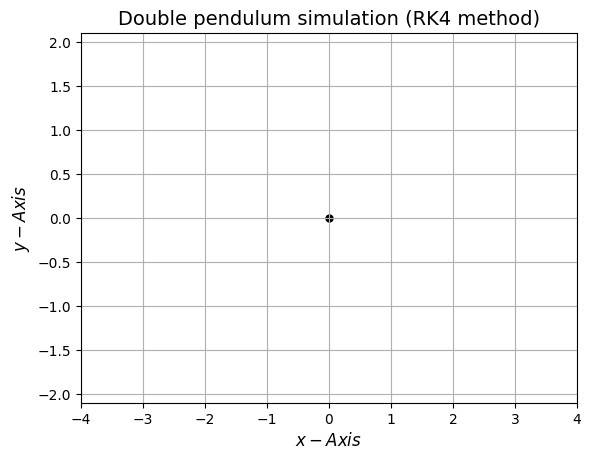

NameError: name 'update' is not defined

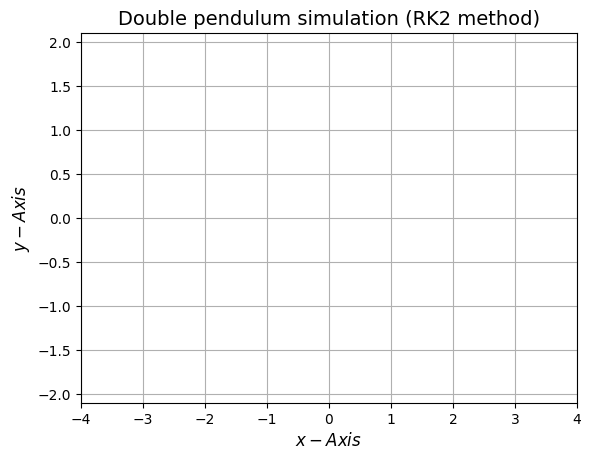

In [30]:
double_pendulum_RK4()
double_pendulum_RK2()
double_pendulum_euler()
double_pendulum_TaylorP()